In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm as tqdm

In [213]:
import warnings
warnings.filterwarnings('ignore')

# Load DataFrames

In [165]:
s = pd.read_csv('structure_feature_mac.csv')
s.drop(columns=s.columns[0], axis=1,  inplace=True)
s.drop(['material_id', 'formula_pretty_reduced'], axis=1, inplace=True)

s

,density,vpa,packing fraction,mean ordering parameter shell 1,mean ordering parameter shell 2,mean ordering parameter shell 3,structural complexity per atom,structural complexity per cell,mean absolute deviation in relative bond length,max relative bond length,...,rdf [19.00000 - 19.10000]A,rdf [19.10000 - 19.20000]A,rdf [19.20000 - 19.30000]A,rdf [19.30000 - 19.40000]A,rdf [19.40000 - 19.50000]A,rdf [19.50000 - 19.60000]A,rdf [19.60000 - 19.70000]A,rdf [19.70000 - 19.80000]A,rdf [19.80000 - 19.90000]A,rdf [19.90000 - 20.00000]A
0,4.759454,11.499077,0.441528,0.473240,0.159709,0.100567,1.918296,46.039100,0.093991,1.095509,...,24.862172,21.409270,22.866603,21.066746,25.446537,30.980820,25.973927,18.814486,21.923160,18.623076
1,4.722491,14.632773,0.473199,0.687468,0.389309,0.248993,2.807355,39.302969,0.151334,1.305147,...,16.235899,11.367403,14.769037,17.229141,14.651550,14.928576,15.078590,11.642500,11.348176,13.224172
2,4.749147,12.356573,0.457318,0.515448,0.225460,0.090441,1.921928,19.219281,0.089015,1.101384,...,12.897460,10.564425,12.843137,8.351268,6.706064,8.232727,10.135501,10.033123,9.383267,11.068263
3,3.264805,20.922121,0.528863,1.025749,0.815709,0.640686,3.663874,113.580086,0.027959,1.077719,...,24.590632,26.332088,46.367439,51.314341,50.347940,27.008040,27.337517,42.598202,29.493705,40.409760
4,2.023930,10.658530,0.242867,0.757317,0.444064,0.248311,3.000000,96.000000,0.087520,1.116125,...,31.225035,33.999007,29.572464,31.034525,28.832894,29.204438,32.378660,31.181820,32.977996,29.408970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,5.310776,20.231021,0.590613,0.614619,0.167112,0.069613,1.584963,9.509775,0.031029,1.046547,...,7.985268,4.741253,11.469630,2.407870,4.766348,6.571100,3.002026,6.933972,4.903060,2.912418
863,2.616442,10.254007,0.600072,0.833071,0.504312,0.287211,4.247928,322.842491,0.065966,1.117554,...,74.425334,74.406603,78.303840,68.212692,76.011532,78.908038,78.698668,75.853640,81.304037,82.295183
864,2.767579,11.324571,0.453303,0.844318,0.504461,0.248381,3.906891,234.413436,0.081731,1.131486,...,54.085244,60.648280,54.280473,60.171242,81.374732,51.778533,53.306716,56.695855,58.413177,60.319730
865,2.784690,10.517738,0.673241,0.787002,0.541325,0.362525,2.251629,54.039100,0.085058,1.113400,...,19.603808,26.063938,26.200406,22.711367,23.230663,22.643239,26.965396,34.503519,21.241762,18.842294


In [166]:
c = pd.read_csv('composition_feature_mac.csv')
c.drop(columns=c.columns[0], axis=1,  inplace=True)
c.drop(['material_id', 'formula'], axis=1, inplace=True)

c

,mean_Number,mean_MendeleevNumber,mean_AtomicWeight,mean_MeltingT,mean_Column,mean_Row,mean_CovalentRadius,mean_Electronegativity,mean_NsValence,mean_NpValence,...,sum_NValence,sum_NsUnfilled,sum_NpUnfilled,sum_NdUnfilled,sum_NfUnfilled,sum_NUnfilled,sum_GSvolume_pa,sum_GSbandgap,sum_GSmagmom,sum_SpaceGroupNumber
0,14.666667,74.666667,32.958769,182.906667,13.666667,2.500000,83.000000,3.113333,1.833333,3.500000,...,42.0,1.0,9.0,0.0,0.0,10.0,79.683333,7.880,0.0,428.0
1,17.714286,73.285714,41.614886,218.057143,11.142857,2.571429,87.000000,2.472857,1.714286,2.285714,...,52.0,2.0,14.0,0.0,0.0,16.0,100.003571,9.478,0.0,655.0
2,15.600000,69.400000,35.339840,304.374000,12.800000,2.600000,93.000000,2.670000,1.800000,3.000000,...,34.0,1.0,9.0,0.0,0.0,10.0,75.468333,0.000,0.0,431.0
3,19.032258,49.774194,41.135224,777.760968,9.290323,3.290323,131.645161,1.871290,1.774194,2.064516,...,128.0,7.0,32.0,71.0,0.0,110.0,778.493333,35.232,0.0,4275.0
4,6.500000,77.000000,12.991030,127.276250,10.250000,1.875000,70.125000,2.666250,1.625000,2.375000,...,32.0,3.0,11.0,0.0,0.0,14.0,88.813571,17.331,0.0,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,28.000000,51.666667,64.693667,683.383333,9.333333,3.666667,129.666667,1.560000,1.666667,1.000000,...,28.0,1.0,3.0,0.0,0.0,4.0,62.113333,0.000,0.0,589.0
863,7.578947,53.526316,16.156813,634.649474,10.105263,2.157895,94.947368,2.325263,1.684211,2.052632,...,72.0,6.0,33.0,9.0,0.0,48.0,235.387500,4.572,0.0,2174.0
864,9.066667,62.333333,18.872448,238.696000,11.600000,2.266667,91.733333,2.498000,1.733333,2.533333,...,74.0,4.0,22.0,0.0,0.0,26.0,198.313810,3.250,0.0,1210.0
865,8.666667,56.833333,17.638033,680.181667,10.666667,2.333333,97.666667,2.390000,1.833333,2.166667,...,24.0,1.0,11.0,0.0,0.0,12.0,88.850833,1.524,0.0,656.0


In [167]:
v_li = pd.read_csv('vibli_feature.csv')
v_li.drop(columns=v_li.columns[0], axis=1,  inplace=True)

v_li

,-10.0THz,-9.75THz,-9.5THz,-9.25THz,-9.0THz,-8.75THz,-8.5THz,-8.25THz,-8.0THz,-7.75THz,...,32.5THz,32.75THz,33.0THz,33.25THz,33.5THz,33.75THz,34.0THz,34.25THz,34.5THz,34.75THz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001076,0.000781,0.000448,0.000074,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.372404,1.867274,0.716524,0.034442,0.125718,0.182331,0.181471,0.1588,0.099792,0.051105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030201,0.026425,0.014009,0.004454,0.000578,0.000000,0.000000,0.0000,0.000000,0.000000
865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000


In [188]:
v_tot = pd.read_csv('vibtot_feature.csv')
v_tot.drop(columns=v_tot.columns[0], axis=1,  inplace=True)

v_tot

,-10.0THz,-9.75THz,-9.5THz,-9.25THz,-9.0THz,-8.75THz,-8.5THz,-8.25THz,-8.0THz,-7.75THz,...,32.5THz,32.75THz,33.0THz,33.25THz,33.5THz,33.75THz,34.0THz,34.25THz,34.5THz,34.75THz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.834260,0.573833,0.312873,0.051324,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.917964,3.370676,1.293421,0.505748,1.846043,2.647209,2.554451,2.22826,1.513141,0.866343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.041742,3.206995,1.758872,0.651187,0.091664,0.000000,0.000000,0.00000,0.000000,0.000000
865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [169]:
v_all = pd.read_csv('viball_feature.csv')
v_all.drop(columns=v_all.columns[0], axis=1,  inplace=True)

v_all

,Total:-10.0THz,Total:-9.75THz,Total:-9.5THz,Total:-9.25THz,Total:-9.0THz,Total:-8.75THz,Total:-8.5THz,Total:-8.25THz,Total:-8.0THz,Total:-7.75THz,...,Li:32.5THz,Li:32.75THz,Li:33.0THz,Li:33.25THz,Li:33.5THz,Li:33.75THz,Li:34.0THz,Li:34.25THz,Li:34.5THz,Li:34.75THz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001076,0.000781,0.000448,0.000074,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.372404,1.867274,0.716524,0.034442,0.125718,0.182331,0.181471,0.1588,0.099792,0.051105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030201,0.026425,0.014009,0.004454,0.000578,0.000000,0.000000,0.0000,0.000000,0.000000
865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000


# Plot correlations

## Self-correlations

### Composition

<Axes: >

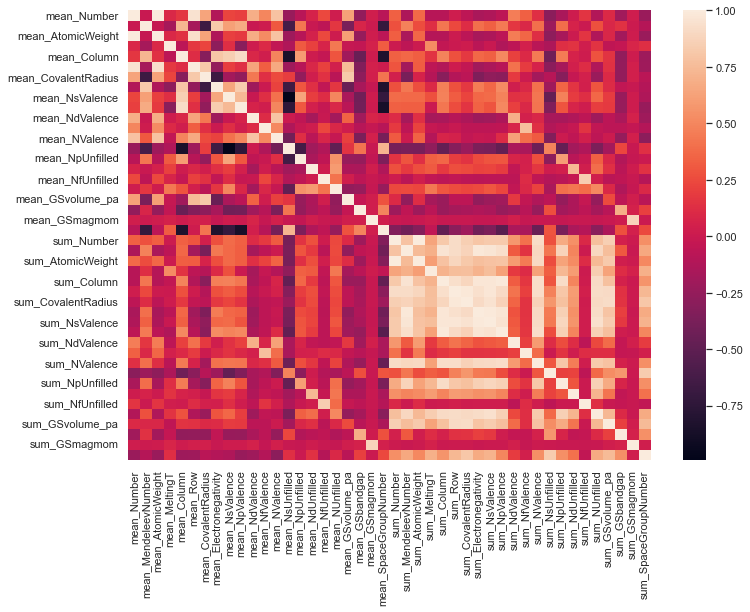

In [170]:
c_corr = c.corr()


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(c_corr)

### Structure

<Axes: >

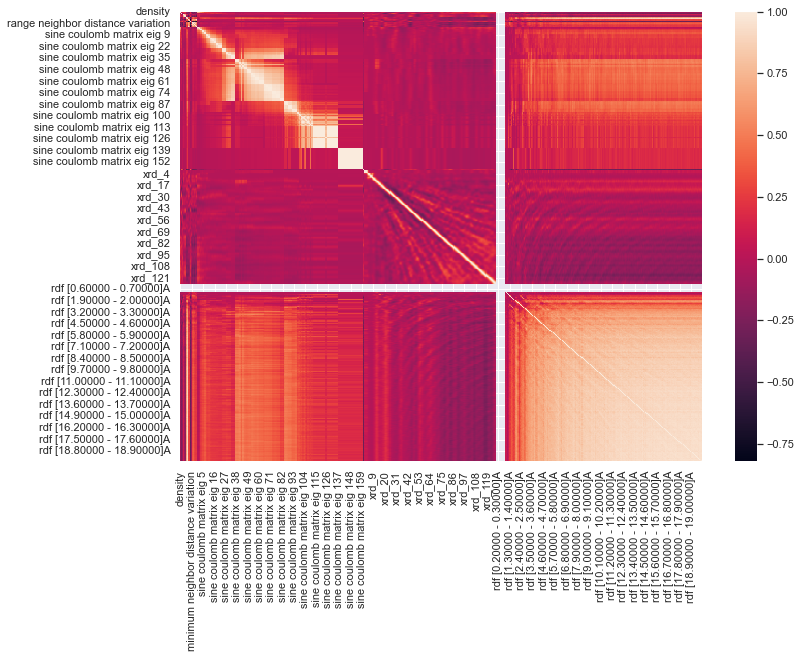

In [171]:
s_corr = s.corr()


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(s_corr)

### Vibrations

<Axes: >

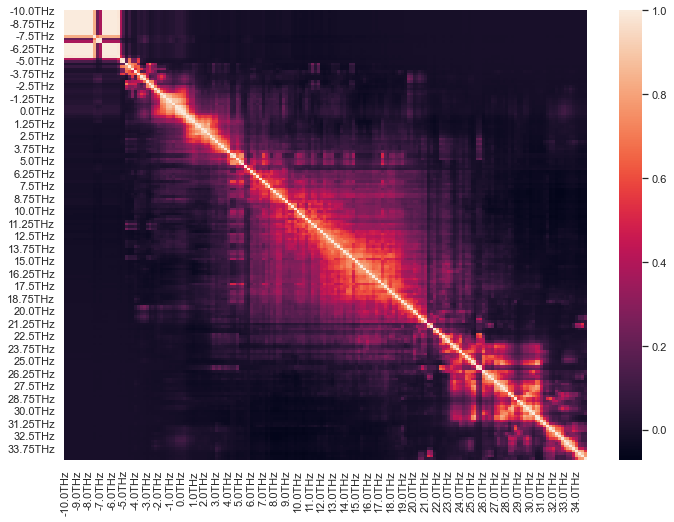

In [172]:
v_li_corr = v_li.corr()


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(v_li_corr)

<Axes: >

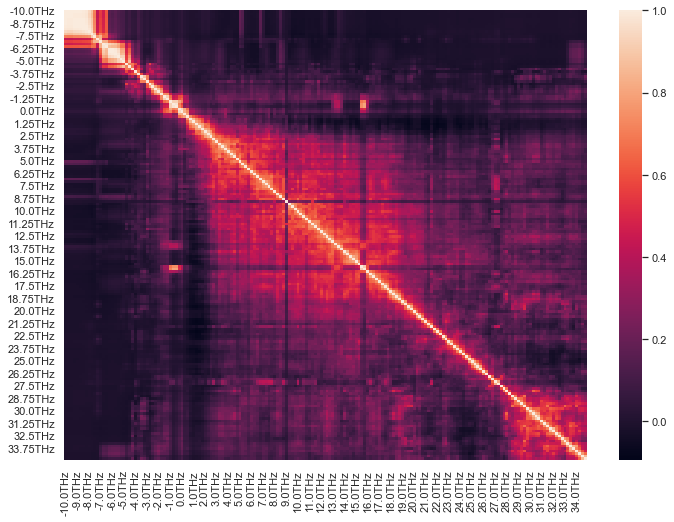

In [189]:
v_tot_corr = v_tot.corr()


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(v_tot_corr)

,Total:-10.0THz,Total:-9.75THz,Total:-9.5THz,Total:-9.25THz,Total:-9.0THz,Total:-8.75THz,Total:-8.5THz,Total:-8.25THz,Total:-8.0THz,Total:-7.75THz,...,Li:32.5THz,Li:32.75THz,Li:33.0THz,Li:33.25THz,Li:33.5THz,Li:33.75THz,Li:34.0THz,Li:34.25THz,Li:34.5THz,Li:34.75THz
Total:-10.0THz,1.000000,0.998696,0.998999,0.998041,0.997366,0.996676,0.993237,0.984479,0.940900,0.879157,...,-0.000602,-0.001104,-0.001096,-0.001361,-0.001366,-0.001987,-0.003162,-0.003758,-0.003448,-0.003114
Total:-9.75THz,0.998696,1.000000,0.999969,0.993783,0.992728,0.991987,0.988068,0.979219,0.930004,0.866956,...,-0.002274,-0.002446,-0.002276,-0.002279,-0.002191,-0.002610,-0.003470,-0.003784,-0.003385,-0.003127
Total:-9.5THz,0.998999,0.999969,1.000000,0.994566,0.993589,0.992885,0.989098,0.980341,0.931977,0.869115,...,-0.002184,-0.002379,-0.002215,-0.002230,-0.002143,-0.002571,-0.003454,-0.003787,-0.003395,-0.003125
Total:-9.25THz,0.998041,0.993783,0.994566,1.000000,0.999916,0.999452,0.996961,0.988787,0.952486,0.892581,...,0.000621,-0.000145,-0.000243,-0.000689,-0.000733,-0.001500,-0.002930,-0.003747,-0.003518,-0.003084
Total:-9.0THz,0.997366,0.992728,0.993589,0.999916,1.000000,0.999759,0.997765,0.990276,0.955885,0.896310,...,0.000727,-0.000070,-0.000178,-0.000643,-0.000690,-0.001478,-0.002947,-0.003792,-0.003567,-0.003119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Li:33.75THz,-0.001987,-0.002610,-0.002571,-0.001500,-0.001478,-0.001575,-0.001742,-0.002101,-0.001469,-0.002215,...,0.280920,0.442259,0.604364,0.770387,0.853661,1.000000,0.817263,0.458535,0.444810,0.293079
Li:34.0THz,-0.003162,-0.003470,-0.003454,-0.002930,-0.002947,-0.003054,-0.003231,-0.003560,-0.003371,-0.004254,...,0.280879,0.358591,0.394948,0.560208,0.576849,0.817263,1.000000,0.839350,0.792090,0.528629
Li:34.25THz,-0.003758,-0.003784,-0.003787,-0.003747,-0.003792,-0.003896,-0.004059,-0.004328,-0.004498,-0.005394,...,0.217604,0.212750,0.177811,0.259261,0.257173,0.458535,0.839350,1.000000,0.899214,0.762143
Li:34.5THz,-0.003448,-0.003385,-0.003395,-0.003518,-0.003567,-0.003657,-0.003802,-0.004024,-0.004311,-0.005103,...,0.110997,0.104912,0.099284,0.201941,0.209458,0.444810,0.792090,0.899214,1.000000,0.784416


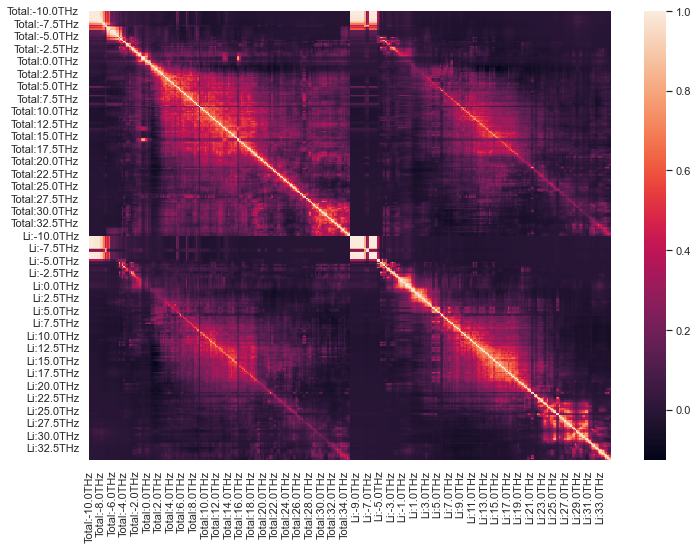

In [194]:
v_all_corr = v_all.corr()


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(v_all_corr)

## Cross-correlations

### Composition-structure

<Axes: >

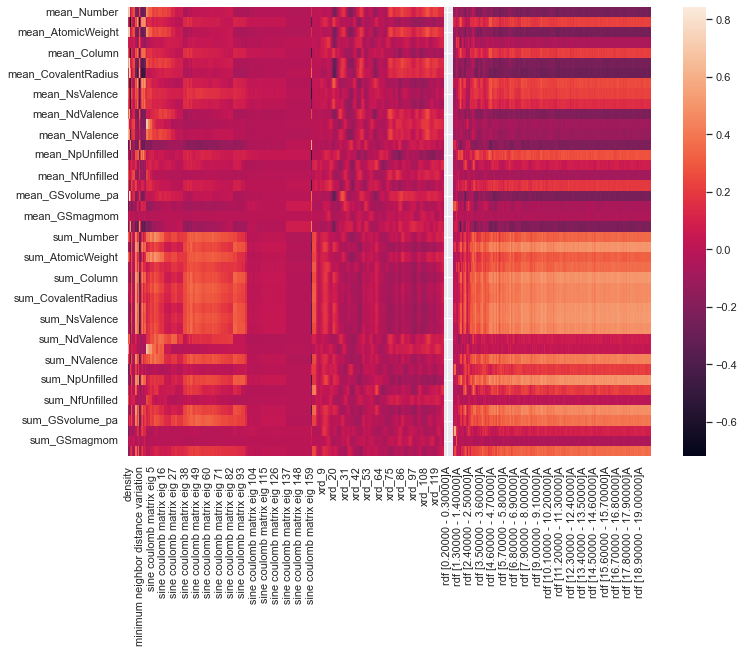

In [214]:
cs_corr = pd.DataFrame()

for i, col in enumerate(s.columns):
    c_scol_corr = c.corrwith(s.loc[:, str(col)], axis=0, method='pearson')
    cs_corr[col] = c_scol_corr
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cs_corr)

### Composition-vibrations

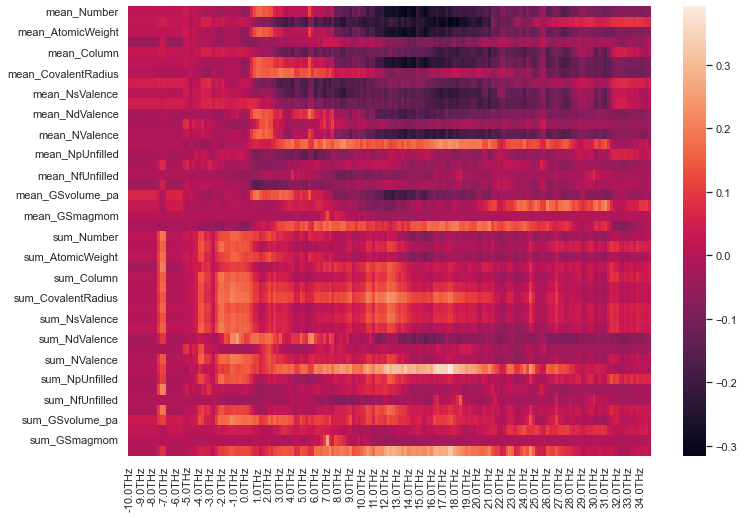

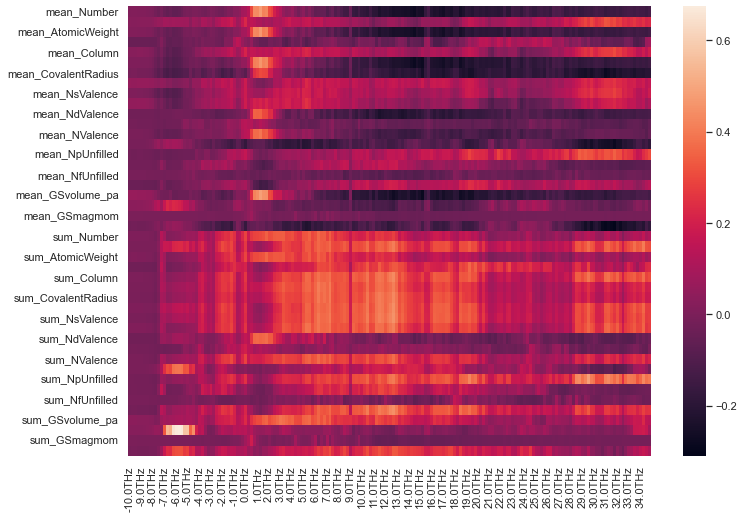

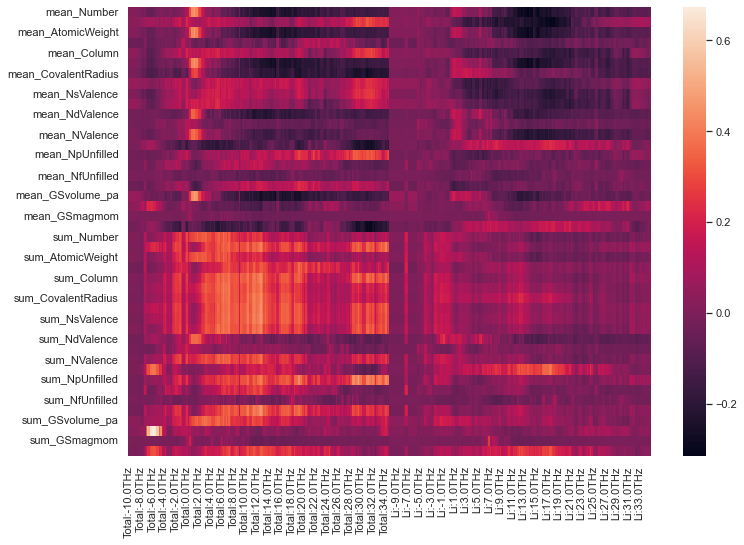

In [216]:
for v in [v_li, v_tot, v_all]:
    cv_corr = pd.DataFrame()
    for i, col in enumerate(v.columns):
        c_vcol_corr = c.corrwith(v.loc[:, str(col)], axis=0, method='pearson')
        cv_corr[col] = c_vcol_corr
    plt.figure()
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.heatmap(cv_corr)

### Structure-vibrations

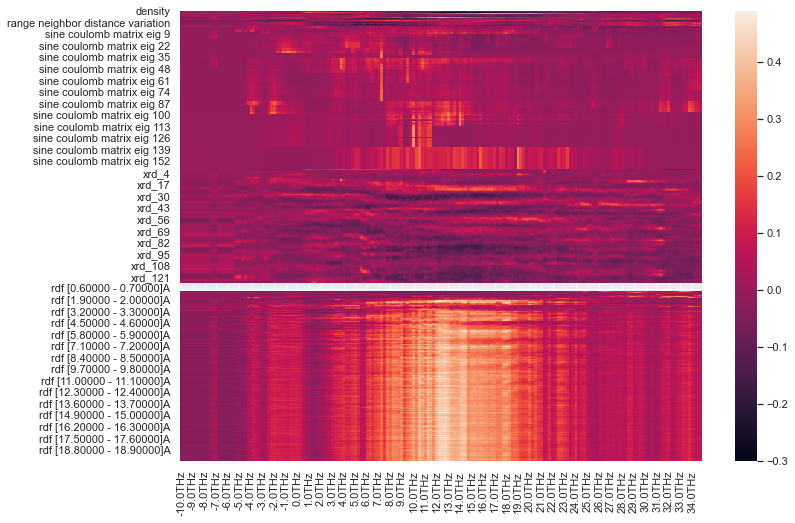

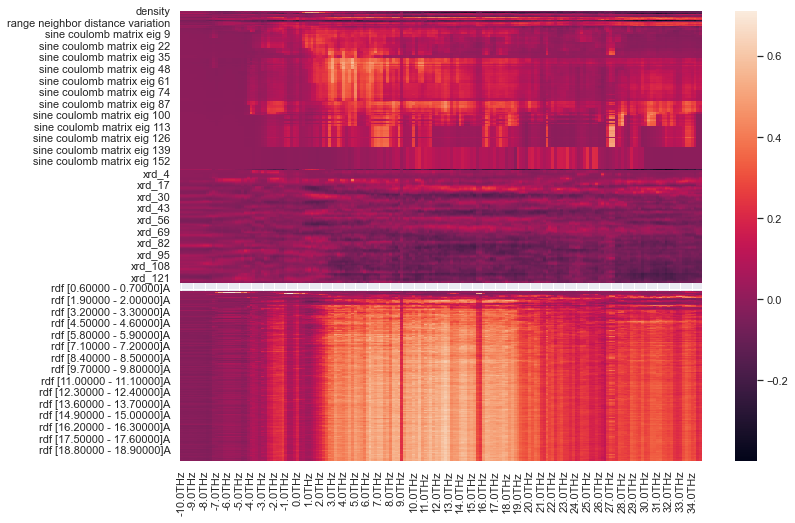

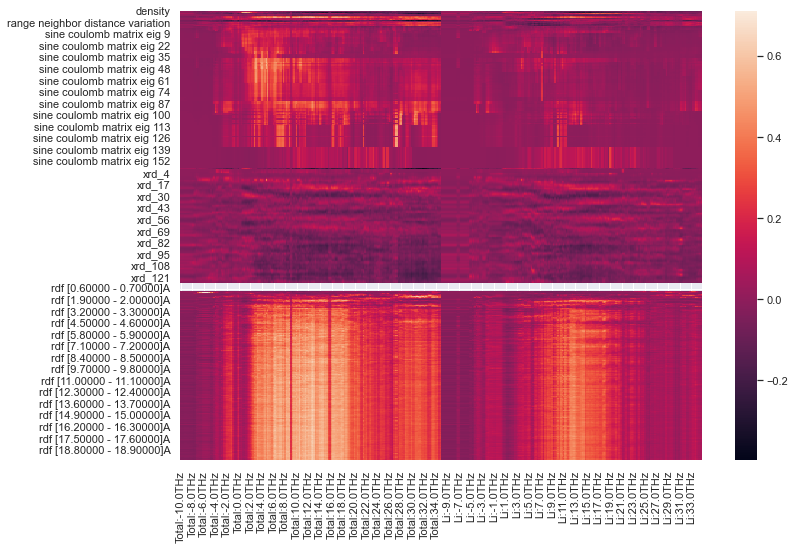

In [217]:
for v in [v_li, v_tot, v_all]:
    sv_corr = pd.DataFrame()
    for i, col in enumerate(v.columns):
        s_vcol_corr = s.corrwith(v.loc[:, str(col)], axis=0, method='pearson')
        sv_corr[col] = s_vcol_corr
    plt.figure()
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.heatmap(sv_corr)